PHASE 4

UNSUPERVISED ML (CLUSTERING)

Let's import the dataset

In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("C:\\Users\\adwit\\OneDrive\\Desktop\\Final_Dataset_India_Crimes.xlsx")
df

,Unnamed: 0,STATE/UT,YEAR,POPULATION,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,...,THEFT CASES REPOERTED_ITER,THEFT VALUE TOTAL_ITER,TOTAL Dacoity_ITER,TOTAL Robbery_ITER,TOTAL Burglary_ITER,TOTAL Theft_ITER,Total Petty Crime_ITER,Human Rights Violation Cases_ITER,Policemen Chargesheeted_ITER,Polimen Charged_ITER
0,0,ANDHRA PRADESH,2001,76210007,2602,1555,136,871,0,871,...,24814.000000,4.231238e+08,214.0,629.0,7220.0,16751.0,24814.0,45.000000,29.000000,2.000000
1,1,ARUNACHAL PRADESH,2001,1097968,83,53,3,33,0,33,...,797.000000,2.583082e+07,22.0,84.0,248.0,443.0,797.0,11.000000,6.000000,0.000000
2,2,ASSAM,2001,26655528,1356,481,40,817,0,817,...,9009.000000,9.193986e+07,532.0,687.0,2423.0,5367.0,9009.0,35.000000,0.000000,0.000000
3,3,BIHAR,2001,82998509,3643,3419,250,888,0,888,...,16428.000000,4.035582e+08,1291.0,2203.0,3233.0,9701.0,16428.0,0.000000,0.000000,0.000000
4,4,CHHATTISGARH,2001,20733232,880,529,45,959,0,959,...,9465.378148,3.694227e+08,87.0,338.0,4144.0,4812.0,9381.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,403,CHANDIGARH,2012,1144839,21,44,5,27,0,27,...,1850.000000,8.347295e+07,3.0,63.0,235.0,1549.0,1850.0,131751.557697,7186.027584,4151.271797
404,404,D & N HAVELI,2012,259148,7,2,0,3,0,3,...,94.000000,1.383436e+07,2.0,2.0,22.0,68.0,94.0,84499.086284,43587.624228,15586.791991
405,405,DAMAN & DIU,2012,191924,3,5,0,5,0,5,...,85.000000,1.528780e+07,1.0,3.0,26.0,55.0,85.0,84499.096509,43587.624639,15586.789241
406,406,LAKSHADWEEP,2012,74578,0,0,0,0,0,0,...,10.000000,2.799750e+05,0.0,0.0,3.0,7.0,10.0,84498.879256,43587.673823,15586.816122


In [3]:
df = df.drop(columns = ['Unnamed: 0'], axis=1)
df

,STATE/UT,YEAR,POPULATION,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,THEFT CASES REPOERTED_ITER,THEFT VALUE TOTAL_ITER,TOTAL Dacoity_ITER,TOTAL Robbery_ITER,TOTAL Burglary_ITER,TOTAL Theft_ITER,Total Petty Crime_ITER,Human Rights Violation Cases_ITER,Policemen Chargesheeted_ITER,Polimen Charged_ITER
0,ANDHRA PRADESH,2001,76210007,2602,1555,136,871,0,871,1182,...,24814.000000,4.231238e+08,214.0,629.0,7220.0,16751.0,24814.0,45.000000,29.000000,2.000000
1,ARUNACHAL PRADESH,2001,1097968,83,53,3,33,0,33,83,...,797.000000,2.583082e+07,22.0,84.0,248.0,443.0,797.0,11.000000,6.000000,0.000000
2,ASSAM,2001,26655528,1356,481,40,817,0,817,1480,...,9009.000000,9.193986e+07,532.0,687.0,2423.0,5367.0,9009.0,35.000000,0.000000,0.000000
3,BIHAR,2001,82998509,3643,3419,250,888,0,888,2159,...,16428.000000,4.035582e+08,1291.0,2203.0,3233.0,9701.0,16428.0,0.000000,0.000000,0.000000
4,CHHATTISGARH,2001,20733232,880,529,45,959,0,959,207,...,9465.378148,3.694227e+08,87.0,338.0,4144.0,4812.0,9381.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,CHANDIGARH,2012,1144839,21,44,5,27,0,27,87,...,1850.000000,8.347295e+07,3.0,63.0,235.0,1549.0,1850.0,131751.557697,7186.027584,4151.271797
404,D & N HAVELI,2012,259148,7,2,0,3,0,3,13,...,94.000000,1.383436e+07,2.0,2.0,22.0,68.0,94.0,84499.086284,43587.624228,15586.791991
405,DAMAN & DIU,2012,191924,3,5,0,5,0,5,3,...,85.000000,1.528780e+07,1.0,3.0,26.0,55.0,85.0,84499.096509,43587.624639,15586.789241
406,LAKSHADWEEP,2012,74578,0,0,0,0,0,0,0,...,10.000000,2.799750e+05,0.0,0.0,3.0,7.0,10.0,84498.879256,43587.673823,15586.816122


4.1  

Create 3 clusters as below.

1. Sensitive Area's
2. Moderate Area's
3. Peaceful Area's

ENCODING STATE/UT COLUMN FOR MODEL BUILDING

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
lab = LabelEncoder()

In [11]:
categorical_columns = ['STATE/UT']

In [12]:
for i in categorical_columns:
    df['STATE/UT_ENC'] = lab.fit_transform(df[i])
    
df

,STATE/UT,YEAR,POPULATION,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,THEFT VALUE TOTAL_ITER,TOTAL Dacoity_ITER,TOTAL Robbery_ITER,TOTAL Burglary_ITER,TOTAL Theft_ITER,Total Petty Crime_ITER,Human Rights Violation Cases_ITER,Policemen Chargesheeted_ITER,Polimen Charged_ITER,STATE/UT_ENC
0,ANDHRA PRADESH,2001,76210007,2602,1555,136,871,0,871,1182,...,4.231238e+08,214.0,629.0,7220.0,16751.0,24814.0,45.000000,29.000000,2.000000,1
1,ARUNACHAL PRADESH,2001,1097968,83,53,3,33,0,33,83,...,2.583082e+07,22.0,84.0,248.0,443.0,797.0,11.000000,6.000000,0.000000,2
2,ASSAM,2001,26655528,1356,481,40,817,0,817,1480,...,9.193986e+07,532.0,687.0,2423.0,5367.0,9009.0,35.000000,0.000000,0.000000,3
3,BIHAR,2001,82998509,3643,3419,250,888,0,888,2159,...,4.035582e+08,1291.0,2203.0,3233.0,9701.0,16428.0,0.000000,0.000000,0.000000,4
4,CHHATTISGARH,2001,20733232,880,529,45,959,0,959,207,...,3.694227e+08,87.0,338.0,4144.0,4812.0,9381.0,0.000000,0.000000,0.000000,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,CHANDIGARH,2012,1144839,21,44,5,27,0,27,87,...,8.347295e+07,3.0,63.0,235.0,1549.0,1850.0,131751.557697,7186.027584,4151.271797,5
404,D & N HAVELI,2012,259148,7,2,0,3,0,3,13,...,1.383436e+07,2.0,2.0,22.0,68.0,94.0,84499.086284,43587.624228,15586.791991,7
405,DAMAN & DIU,2012,191924,3,5,0,5,0,5,3,...,1.528780e+07,1.0,3.0,26.0,55.0,85.0,84499.096509,43587.624639,15586.789241,8
406,LAKSHADWEEP,2012,74578,0,0,0,0,0,0,0,...,2.799750e+05,0.0,0.0,3.0,7.0,10.0,84498.879256,43587.673823,15586.816122,17


In [16]:
x = df[['STATE/UT_ENC','TOTAL IPC CRIMES']]
x

,STATE/UT_ENC,TOTAL IPC CRIMES
0,1,130089
1,2,2342
2,3,36877
3,4,88432
4,6,38460
...,...,...
403,5,3606
404,7,318
405,8,239
406,17,60


FITTING KMEANS TO DATASET

In [18]:
kmeans = KMeans(n_clusters = 3,random_state = 70)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[2 1 1 2 1 1 2 1 1 1 1 2 2 0 0 1 1 1 1 1 1 0 1 0 1 0 1 2 1 1 1 1 1 1 0 1 1
 2 1 1 2 1 1 1 1 2 2 0 0 1 1 1 1 1 1 0 1 0 1 0 1 2 1 1 1 1 1 1 0 1 1 2 1 1
 2 1 1 1 1 2 2 0 0 1 1 1 1 1 1 0 1 0 1 2 1 2 1 1 1 1 1 1 0 1 1 2 1 1 2 1 1
 1 1 2 2 0 0 1 1 1 1 1 1 0 1 0 1 2 1 2 1 1 1 1 1 1 0 1 1 2 1 1 2 1 1 1 1 2
 2 0 0 1 1 1 1 1 1 0 1 0 1 2 1 2 1 1 1 1 1 1 0 1 1 2 1 1 2 1 1 1 1 2 2 0 0
 1 1 1 1 1 1 0 1 0 1 2 1 2 1 1 1 1 1 1 0 1 1 2 1 1 2 1 1 1 1 2 2 0 0 1 1 1
 1 2 1 0 1 0 1 0 1 2 1 1 1 1 1 1 0 1 1 2 1 1 2 2 1 1 1 2 2 0 0 1 1 1 1 2 1
 0 1 0 1 0 1 2 1 1 1 1 1 1 0 1 2 2 1 1 2 2 1 1 1 2 2 0 0 1 1 1 1 2 1 0 1 0
 1 0 1 2 1 1 1 1 1 1 0 1 2 2 2 1 2 2 1 1 1 0 0 0 0 1 1 1 1 2 1 0 1 0 1 0 1
 2 1 1 1 1 1 1 0 1 2 0 2 1 2 2 1 1 1 0 0 0 0 1 1 1 1 2 1 0 1 0 1 0 1 0 1 1
 1 1 1 1 0 1 2 0 2 1 2 2 1 1 1 2 0 0 0 1 1 1 1 2 1 0 1 0 1 0 1 0 1 1 1 1 1
 1]


MODEL EVALUATION

In [25]:
silhouette_score(x,y_kmeans)

0.6947420185593164

4.2


SEPERATE STATES BASED ON CLUSTERS

In [43]:
sensitive_cluster = df[y_kmeans==0]
print(sensitive_cluster)
print('*************')
moderate_cluster = df[y_kmeans==2]
print(moderate_cluster)
peaceful_cluster = df[y_kmeans==1]
print(peaceful_cluster)
print('*************')


           STATE/UT  YEAR  POPULATION  MURDER  ATTEMPT TO MURDER  \
13   MADHYA PRADESH  2001    60348023    2425               2870   
14      MAHARASHTRA  2001    96878627    2839               1454   
21        RAJASTHAN  2001    56507188    1259               1923   
23       TAMIL NADU  2001    62405679    1662               2204   
25    UTTAR PRADESH  2001   166197921    7601               7964   
..              ...   ...         ...     ...                ...   
388     MAHARASHTRA  2012   114211021    2712               2168   
395       RAJASTHAN  2012    65494555    1461               1538   
397      TAMIL NADU  2012    75118424    1949               2954   
399   UTTAR PRADESH  2012   205888020    4966               4811   
401     WEST BENGAL  2012    91193022    2252               2854   

     CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
13                                         125  2851               0   
14                                     

VISUALIZING THE CLUSTERS

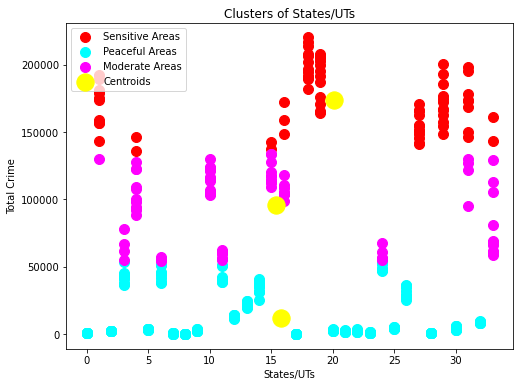

In [44]:
plt.figure(figsize = (8,6))
plt.scatter(x[y_kmeans==0]['STATE/UT_ENC'],x[y_kmeans==0]['TOTAL IPC CRIMES'],s=100, c = 'red', label = 'Sensitive Areas')
plt.scatter(x[y_kmeans==1]['STATE/UT_ENC'],x[y_kmeans==1]['TOTAL IPC CRIMES'],s=100, c = 'cyan', label = 'Peaceful Areas')
plt.scatter(x[y_kmeans==2]['STATE/UT_ENC'],x[y_kmeans==2]['TOTAL IPC CRIMES'],s=100, c = 'magenta', label = 'Moderate Areas')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of States/UTs')
plt.xlabel('States/UTs')
plt.ylabel('Total Crime')
plt.legend()
plt.show()

Visulazie the clusters according to states

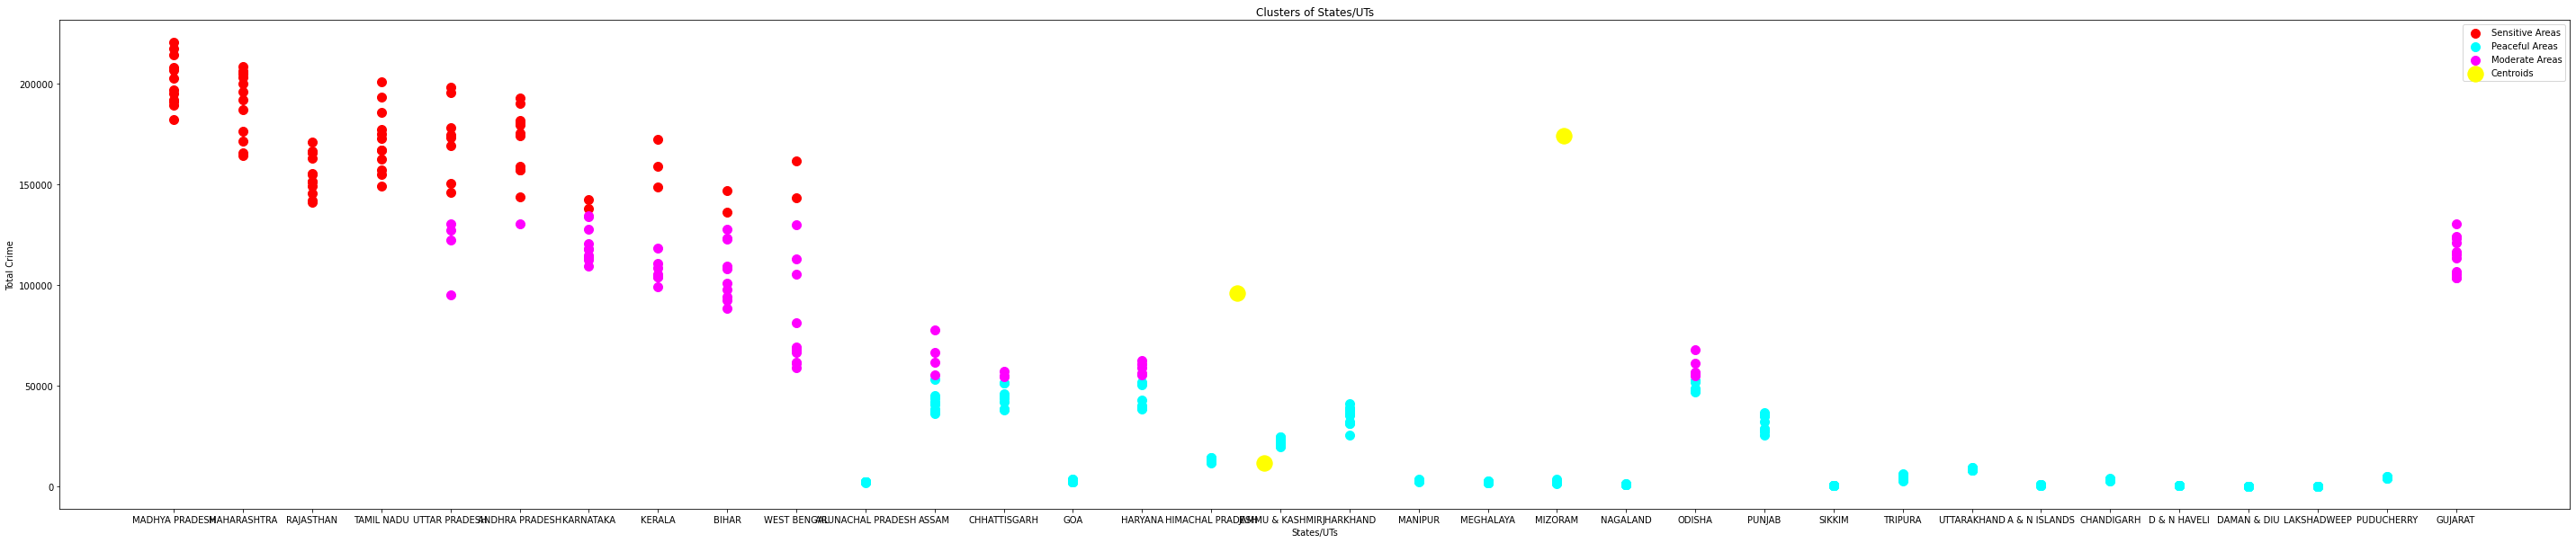

In [45]:
plt.figure(figsize = (50,10))
plt.scatter(df[y_kmeans==0]['STATE/UT'],df[y_kmeans==0]['TOTAL IPC CRIMES'],s=100, c = 'red', label = 'Sensitive Areas')
plt.scatter(df[y_kmeans==1]['STATE/UT'],df[y_kmeans==1]['TOTAL IPC CRIMES'],s=100, c = 'cyan', label = 'Peaceful Areas')
plt.scatter(df[y_kmeans==2]['STATE/UT'],df[y_kmeans==2]['TOTAL IPC CRIMES'],s=100, c = 'magenta', label = 'Moderate Areas')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of States/UTs')
plt.xlabel('States/UTs')
plt.ylabel('Total Crime')
plt.legend()
plt.show()

Let's look at the different seperated clusters

In [46]:
sensitive_cluster

,STATE/UT,YEAR,POPULATION,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,THEFT VALUE TOTAL_ITER,TOTAL Dacoity_ITER,TOTAL Robbery_ITER,TOTAL Burglary_ITER,TOTAL Theft_ITER,Total Petty Crime_ITER,Human Rights Violation Cases_ITER,Policemen Chargesheeted_ITER,Polimen Charged_ITER,STATE/UT_ENC
13,MADHYA PRADESH,2001,60348023,2425,2870,125,2851,0,2851,956,...,4.622846e+08,166.0,1764.0,13549.0,20263.0,35742.0,4.000000,4.000000,0.000000,18
14,MAHARASHTRA,2001,96878627,2839,1454,101,1302,0,1302,985,...,2.183564e+09,529.0,2239.0,15073.0,39866.0,57707.0,13.000000,8.000000,0.000000,19
21,RAJASTHAN,2001,56507188,1259,1923,63,1049,0,1049,2718,...,5.513910e+08,60.0,889.0,7284.0,16939.0,25172.0,4.000000,3.000000,0.000000,27
23,TAMIL NADU,2001,62405679,1662,2204,19,423,0,423,952,...,4.166831e+08,158.0,672.0,5965.0,16709.0,23504.0,-9.889027,2.222779,-1.200743,29
25,UTTAR PRADESH,2001,166197921,7601,7964,1186,1958,0,1958,4330,...,1.342018e+09,905.0,3825.0,8411.0,27011.0,40152.0,15.000000,53.000000,0.000000,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,MAHARASHTRA,2012,114211021,2712,2168,171,1839,0,1839,1583,...,5.103076e+08,793.0,6949.0,15648.0,47476.0,70866.0,84424.764799,43595.586167,15576.755841,19
395,RAJASTHAN,2012,65494555,1461,1538,98,2049,0,2049,3243,...,1.900879e+09,31.0,807.0,4610.0,23314.0,28762.0,84493.609449,43581.411853,15580.584845,27
397,TAMIL NADU,2012,75118424,1949,2954,44,737,0,737,1945,...,1.290410e+09,97.0,1898.0,4457.0,11996.0,18448.0,84486.530939,43587.326486,15582.638915,29
399,UTTAR PRADESH,2012,205888020,4966,4811,1410,1963,0,1963,8878,...,2.152335e+09,322.0,3159.0,6187.0,37376.0,47044.0,84495.079734,43576.273677,15577.549873,31


In [47]:
moderate_cluster

,STATE/UT,YEAR,POPULATION,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,THEFT VALUE TOTAL_ITER,TOTAL Dacoity_ITER,TOTAL Robbery_ITER,TOTAL Burglary_ITER,TOTAL Theft_ITER,Total Petty Crime_ITER,Human Rights Violation Cases_ITER,Policemen Chargesheeted_ITER,Polimen Charged_ITER,STATE/UT_ENC
0,ANDHRA PRADESH,2001,76210007,2602,1555,136,871,0,871,1182,...,4.231238e+08,214.0,629.0,7220.0,16751.0,24814.0,45.000000,29.000000,2.000000,1
3,BIHAR,2001,82998509,3643,3419,250,888,0,888,2159,...,4.035582e+08,1291.0,2203.0,3233.0,9701.0,16428.0,0.000000,0.000000,0.000000,4
6,GUJARAT,2001,50579626,1226,537,94,286,0,286,998,...,6.668924e+08,327.0,991.0,5142.0,15834.0,22294.0,12.000000,8.000000,0.000000,10
11,KARNATAKA,2001,52709035,1626,1475,74,293,0,293,559,...,3.694255e+08,178.0,847.0,6394.0,12868.0,20287.0,15.000000,5.000000,0.000000,15
12,KERALA,2001,31841374,472,615,111,562,0,562,183,...,3.844651e+08,176.0,517.0,4474.0,5441.0,10608.0,-0.798923,0.628165,-0.460470,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,CHHATTISGARH,2012,24431400,998,593,26,1034,0,1034,450,...,4.045176e+08,64.0,412.0,3334.0,5341.0,9151.0,84510.369684,43583.629958,15584.729161,6
380,GUJARAT,2012,57731543,1126,557,43,473,0,473,1720,...,1.990981e+09,287.0,1366.0,4695.0,15952.0,22300.0,84504.173136,43583.236559,15581.758853,10
381,HARYANA,2012,26010282,991,910,68,668,0,668,1349,...,1.248049e+09,204.0,711.0,5129.0,17590.0,23634.0,84490.749651,43584.675104,15582.306779,11
385,KARNATAKA,2012,64017056,1860,1923,71,621,0,621,1451,...,2.117308e+09,211.0,2207.0,5792.0,18418.0,26628.0,84484.716285,43586.491264,15580.863904,15


In [48]:
peaceful_cluster

,STATE/UT,YEAR,POPULATION,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,THEFT VALUE TOTAL_ITER,TOTAL Dacoity_ITER,TOTAL Robbery_ITER,TOTAL Burglary_ITER,TOTAL Theft_ITER,Total Petty Crime_ITER,Human Rights Violation Cases_ITER,Policemen Chargesheeted_ITER,Polimen Charged_ITER,STATE/UT_ENC
1,ARUNACHAL PRADESH,2001,1097968,83,53,3,33,0,33,83,...,2.583082e+07,22.0,84.0,248.0,443.0,797.0,11.000000,6.000000,0.000000,2
2,ASSAM,2001,26655528,1356,481,40,817,0,817,1480,...,9.193986e+07,532.0,687.0,2423.0,5367.0,9009.0,35.000000,0.000000,0.000000,3
4,CHHATTISGARH,2001,20733232,880,529,45,959,0,959,207,...,3.694227e+08,87.0,338.0,4144.0,4812.0,9381.0,0.000000,0.000000,0.000000,6
5,GOA,2001,1347668,36,30,5,12,0,12,9,...,3.078142e+07,7.0,25.0,359.0,576.0,967.0,0.370110,-0.238312,0.481448,9
7,HARYANA,2001,21144564,781,467,78,398,0,398,449,...,3.518212e+08,77.0,397.0,3109.0,6117.0,9700.0,6.000000,5.000000,0.000000,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,CHANDIGARH,2012,1144839,21,44,5,27,0,27,87,...,8.347295e+07,3.0,63.0,235.0,1549.0,1850.0,131751.557697,7186.027584,4151.271797,5
404,D & N HAVELI,2012,259148,7,2,0,3,0,3,13,...,1.383436e+07,2.0,2.0,22.0,68.0,94.0,84499.086284,43587.624228,15586.791991,7
405,DAMAN & DIU,2012,191924,3,5,0,5,0,5,3,...,1.528780e+07,1.0,3.0,26.0,55.0,85.0,84499.096509,43587.624639,15586.789241,8
406,LAKSHADWEEP,2012,74578,0,0,0,0,0,0,0,...,2.799750e+05,0.0,0.0,3.0,7.0,10.0,84498.879256,43587.673823,15586.816122,17


4.3

OBSERVATIONS:

1. MOST SENSITIVE STATES:
    - MADHYA PRADESH
    - MAHARASHTRA
    - RAJASTHAN
    - TAMIL NADU
    - UTTAR PRADESH

2. MOST PEACEFUL STATES:
    - NAGALAND
    - SIKKIM
    - ANDAMAN AND NICOBAR ISLANDS
    - DAMAN AND DIU
    - DADRI AND NAGAR HAVELI
    - LAKSHWADEEP

- From the above obervations we can conclude, Area of a State and it's Population plays a major role in Overall Crime

- Overall Crime can be decreased with increasing the Literacy Rate or reducing the population in the state

4.4

PROJECT REPORT

Introduction:
This project report aims to analyze crime data for various states and union territories in India and examine the factors that contribute to crime rates. The analysis focuses on two key aspects: sensitivity and peacefulness of states, and the relationship between crime rates and factors such as literacy rate, area size, and population.

Methodology:
The analysis is based on the provided crime data for the years 2001 and 2012. The data includes information on different types of crimes, population, literacy rates, and area sizes for each state and union territory. The states with the highest sensitivity and peacefulness were identified based on the given data.

Findings and Analysis:

Sensitivity of States:
The most sensitive states based on the provided data for 2001 were Madhya Pradesh, Maharashtra, Rajasthan, Tamil Nadu, and Uttar Pradesh. These states exhibited relatively higher crime rates in categories such as murder, attempt to murder, rape, kidnapping, theft, etc.

Peacefulness of States:
The most peaceful states based on the provided data for 2001 were Nagaland, Sikkim, Andaman and Nicobar Islands, Daman and Diu, Dadra and Nagar Haveli, and Lakshadweep. These states showed relatively lower crime rates in various categories.

Relationship Between Literacy Rate and Total Crimes:
An analysis of literacy rates and total crimes revealed a potential correlation between higher literacy rates and lower crime rates. States with higher literacy rates, such as Kerala, Mizoram, Tripura, Goa, and Himachal Pradesh, generally exhibited lower crime rates. Conversely, states with lower literacy rates, including Bihar, Arunachal Pradesh, Rajasthan, Uttar Pradesh, and Jharkhand, tended to have higher crime rates.

Relationship Between Type of Crime, Literacy Rate, and State:
The analysis of the relationship between the type of crime, literacy rate, and state showed varying patterns. Mizoram, Sikkim, Nagaland, Tripura, and Manipur were identified as states with relatively lower crime rates and higher literacy rates. On the other hand, Delhi, Assam, Bihar, Rajasthan, and Uttar Pradesh were states with higher crime rates and varying literacy rates.

Year-on-Year Total Crime Rate:
An examination of the year-on-year changes in the total crime rate revealed an overall increasing trend in crime rates from 2001 to 2012. However, a detailed analysis of the data for each state and union territory is necessary to identify specific trends and patterns.

Analysis of Area Size and Overall Crime:
While larger states like Rajasthan, Madhya Pradesh, Maharashtra, and Uttar Pradesh had higher crime rates, it is important to note that area size alone does not determine crime rates. Other socio-economic factors, demographics, law enforcement measures, and cultural aspects also contribute to crime rates.

Analysis of Population and Overall Crime:
States with larger populations, such as Uttar Pradesh, Maharashtra, Bihar, West Bengal, and Andhra Pradesh, tend to have higher crime rates. However, population size alone is not the sole determinant of crime rates, as socio-economic factors, community dynamics, and law enforcement efforts also play significant roles.

Conclusion:
Based on the analysis of crime data and the factors affecting crime rates in Indian states, several conclusions can be drawn. There is a potential correlation between higher literacy rates and lower crime rates, emphasizing the importance of education and awareness in reducing crime. While larger states and higher population densities can contribute to higher crime rates, other factors such as socio-economic conditions, demographics, and law enforcement efforts also play crucial roles.